In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [89]:
X,y=make_blobs(n_samples=500,centers=5,random_state=3)

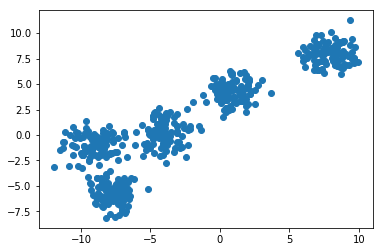

In [90]:
plt.scatter(X[:,0],X[:,1])

## Algo

In [181]:
def distance(v1,v2):
    
    return np.sqrt(np.sum((v1-v2)**2))
def initial():
    k=5
    color=["green","blue","red","yellow","orange"]
    clusters={}
    for i in range(k):
        center=10*(2*np.random.random((X.shape[1],))-1)
        points=[]
        cluster={"center":center,"points":points,"color":color[i]}
        clusters[i]=cluster
        
    return k,clusters

def AssignPoint(X,clusters,k):
    for i in range(X.shape[0]):
        curr_point=X[i]
        dist=[]
        for kx in range(k):
            cen=clusters[kx]["center"]
            d=distance(curr_point,clusters[kx]["center"])
            dist.append(d)
        min_center=np.argmin(dist)
        clusters[min_center]["points"].append(curr_point)

def UpdateCenter(clusters,k):
    for kx in range(k):
        pts=np.array(clusters[kx]["points"])
        if(pts.shape[0]>0):
            new_cen=pts.mean(axis=0)
            clusters[kx]["center"]=new_cen
            clusters[kx]["points"]=[]

        

def plotclus(clusters,k):
    for kx in range(k):
        pnts=np.array(clusters[kx]["points"])
        try:
            plt.scatter(pnts[:,0],pnts[:,1],c=clusters[kx]["color"])
        except:
            pass
        uk=clusters[kx]["center"]
        plt.scatter(uk[0],uk[1],c="black",marker='*')

def Kmean(X,iterations=10):
    k,clusters=initial()
    for i in range(iterations):
        AssignPoint(X,clusters,k)
        UpdateCenter(clusters,k)
    AssignPoint(X,clusters,k)
    plotclus(clusters,k)
    return clusters

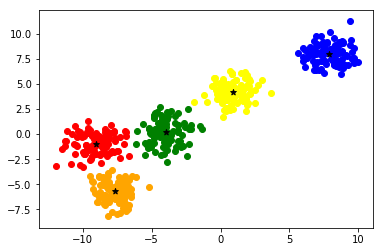

In [189]:
op=Kmean(X,5)